# Problemdefinition und Ziel

PROBLEM: Der Marktwert von Spielern unterscheiden sich sehr Stark. Schwer sowas vorauszusagen.

ZIEL: Marktwert eines Spielers ermitteln, um am Ende Daten einzugeben und dann den Marktwert vom Spieler bekommen.

- Welche Features bestimmen den Marktwert eines Spielers? Gewichtung herausfinden (Regression)

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Auwahl des Datensatzes

- kaggle Dataset: https://www.kaggle.com/datasets/davidcariboo/player-scores
- Fußball Daten: https://www.transfermarkt.co.uk
- Beinhaltet: Spiele, Klubwerte, Wettbewerbe, Kaderinformationen, Spielerwerte-/entwicklungen, Transferhistorie
- Im Notebook "0_help_create_data" wurde die wesentliche Daten genommen, die für ein einzelnen Spieler relvant sein können

# Beschreibung des Datensatzes & first look

- players = beinhaltet alle wichtigen Infos zu einem Spieler
- competetions = sind einzelen Informationen zu einem Wettbewerb oder einer Liga
- clubs = sind einzelne Informationen zu einem Klub

In [2]:
players = pd.read_csv("data/players.csv")
competitions = pd.read_csv("data/competitions.csv")
clubs = pd.read_csv("data/clubs.csv")

### players

In [3]:
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,total_transfer_fee,total_starting_lineups,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,0,69,45,5,114,19.0,0.0,48.0,25.0,8808.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,0,101,144,38,245,4.0,2.0,0.0,0.0,13508.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,0,62,30,2,92,11.0,1.0,38.0,13.0,8788.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,0,0,0,0,0,0.0,0.0,0.0,0.0,307.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,0,8,102,0,110,0.0,0.0,0.0,0.0,1080.0


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   first_name                            30539 non-null  object 
 2   last_name                             32601 non-null  object 
 3   name                                  32601 non-null  object 
 4   last_season                           32601 non-null  int64  
 5   current_club_id                       32601 non-null  int64  
 6   player_code                           32601 non-null  object 
 7   country_of_birth                      29802 non-null  object 
 8   city_of_birth                         30146 non-null  object 
 9   country_of_citizenship                32218 non-null  object 
 10  date_of_birth                         32554 non-null  object 
 11  sub_position   

### competitions

In [5]:
competitions.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False


In [6]:
competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   competition_id            44 non-null     object
 1   competition_code          44 non-null     object
 2   name                      44 non-null     object
 3   sub_type                  44 non-null     object
 4   type                      44 non-null     object
 5   country_id                44 non-null     int64 
 6   country_name              36 non-null     object
 7   domestic_league_code      36 non-null     object
 8   confederation             44 non-null     object
 9   url                       44 non-null     object
 10  is_major_national_league  44 non-null     bool  
dtypes: bool(1), int64(1), object(9)
memory usage: 3.6+ KB


### clubs

In [7]:
clubs.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,26.6,15,50.0,8,Beşiktaş Park,42445,€-25.26m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.5,21,70.0,18,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [8]:
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  439 non-null    int64  
 1   club_code                439 non-null    object 
 2   name                     439 non-null    object 
 3   domestic_competition_id  439 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               439 non-null    int64  
 6   average_age              401 non-null    float64
 7   foreigners_number        439 non-null    int64  
 8   foreigners_percentage    390 non-null    float64
 9   national_team_players    439 non-null    int64  
 10  stadium_name             439 non-null    object 
 11  stadium_seats            439 non-null    int64  
 12  net_transfer_record      439 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

# Datenbereinigung "players"

In [9]:
players.isna().sum()

player_id                                   0
first_name                               2062
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2799
city_of_birth                            2455
country_of_citizenship                    383
date_of_birth                              47
sub_position                              180
position                                    0
foot                                     2536
height_in_cm                             2256
contract_expiration_date                12091
agent_name                              16019
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                           0
market_value_in_eur               

In [10]:
(players == " ").sum()

player_id                               0
first_name                              0
last_name                               0
name                                    0
last_season                             0
current_club_id                         0
player_code                             0
country_of_birth                        0
city_of_birth                           0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
contract_expiration_date                0
agent_name                              0
image_url                               0
url                                     0
current_club_domestic_competition_id    0
current_club_name                       0
market_value_in_eur                     0
highest_market_value_in_eur             0
number_of_transfers               

### 'first_name' & 'last_name'

In [11]:
players[players["first_name"].isna()].sort_values(by=["market_value_in_eur"], ascending=False)[["first_name", "last_name"]]

,first_name,last_name
19985,NaN,Vinicius Junior
31174,NaN,Lamine Yamal
19513,NaN,Rodri
28014,NaN,Pedri
21468,NaN,Rodrygo
...,...,...
32181,NaN,Italo
32274,NaN,Marlon Maranhão
32320,NaN,Leonardo Casaes
32361,NaN,Peixinho


- Vor und Nachname sind zusammengetragen und in 'last_name' drinne
- jedoch nicht so wichtig für die Regression
- widerum gibt es Spieler, die deren Spitzname nur hier als 'last_name' haben (Bsp.: Rodri, ausgeschrieben: Rodrigo Hernández Cascante)

In [12]:
players["first_name"] = players["first_name"].fillna("look_last_name")

### 'last_season'

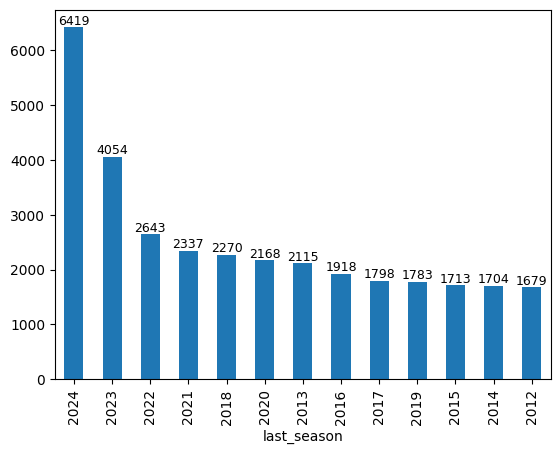

In [13]:
ax = players.last_season.value_counts().sort_values(ascending=False).plot(kind="bar")

for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=0
    )

plt.show()

- 'last_season' sieht gut aus - hat keine fehlende oder falsche Werte
- zudem sieht die Verteilung gut aus (Konzentration auf eher aktuelle Spieler)

### 'current_club_id'

In [14]:
players["current_club_id"].isna().value_counts()

current_club_id
False    32601
Name: count, dtype: int64

- alle haben eine ID für deren aktuellen (zuletzt aktuellen) Club

### 'country_of_birth' & 'city_of_birth'

In [15]:
players[(players["country_of_birth"].isna()) | (players["city_of_birth"].isna())].sort_values(by="market_value_in_eur", ascending=False)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,total_transfer_fee,total_starting_lineups,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played
15585,266302,Sergej,Milinković-Savić,Sergej Milinković-Savić,2022,398,sergej-milinković-savić,NaN,Lleida,NaN,...,0,311,68,25,379,78.0,1.0,72.0,58.0,27660.0
11126,171424,Riyad,Mahrez,Riyad Mahrez,2022,281,riyad-mahrez,NaN,Sarcelles,NaN,...,0,296,144,1,440,13.0,0.0,113.0,88.0,25892.0
18735,341705,look_last_name,Gerson,Gerson,2022,244,gerson,NaN,Rio de Janeiro,NaN,...,0,87,116,0,203,18.0,0.0,16.0,12.0,7616.0
18926,344888,Habib,Diallo,Habib Diallo,2022,667,habib-diallo,NaN,Thiès,NaN,...,0,109,44,14,153,10.0,1.0,53.0,11.0,9927.0
13624,225083,N'Golo,Kanté,N'Golo Kanté,2022,631,ngolo-kante,NaN,Paris,NaN,...,0,293,50,7,343,43.0,0.0,15.0,25.0,26092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32594,1367128,Abdoulaye,Yoro,Abdoulaye Yoro,2024,6890,abdoulaye-yoro,NaN,NaN,Cote d'Ivoire,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
32597,1378362,Orseer,Achihi,Orseer Achihi,2024,1096,orseer-achihi,NaN,NaN,Nigeria,...,0,0,0,0,0,1.0,0.0,0.0,0.0,27.0
32598,1380311,Prince Amoako,Junior,Prince Amoako Junior,2024,2778,prince-amoako-junior,NaN,NaN,Ghana,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
32599,1380876,Gabriel Jesus,David,Gabriel Jesus David,2024,1096,gabriel-jesus-david,NaN,NaN,Nigeria,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0


In [16]:
players["country_of_birth"] = players["country_of_birth"].fillna(players["country_of_citizenship"])

In [17]:
players["country_of_birth"].isna().sum()

np.int64(382)

https://www.kaggle.com/datasets/juanmah/world-cities?resource=download

In [18]:
worldcities = pd.read_csv("data/worldcities.csv", usecols=["city", "country"])
worldcities.head()

,city,country
0,Tokyo,Japan
1,Jakarta,Indonesia
2,Delhi,India
3,Guangzhou,China
4,Mumbai,India


In [19]:
worldcities.value_counts()

city              country      
Springfield       United States    11
Washington        United States    11
Middletown        United States    10
Franklin          United States     9
Monroe            United States     9
                                   ..
Hasselt           Belgium           1
Hassi Bahbah      Algeria           1
Hassi Fedoul      Algeria           1
Hassi Khelifa     Algeria           1
’s-Hertogenbosch  Netherlands       1
Name: count, Length: 45863, dtype: int64

In [20]:
city_country = (worldcities.drop_duplicates(subset="city", keep="first")[["city", "country"]])

In [21]:
players[players["country_of_birth"].isna() & players["city_of_birth"].notna()]

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,total_transfer_fee,total_starting_lineups,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played
325,4311,Maarten,Stekelenburg,Maarten Stekelenburg,2022,610,maarten-stekelenburg,NaN,Haarlem,NaN,...,0,93,238,0,331,4.0,0.0,0.0,0.0,10251.0
389,4742,Christophe,Lepoint,Christophe Lepoint,2022,2715,christophe-lepoint,NaN,Brussel,NaN,...,0,155,63,49,218,36.0,1.0,24.0,23.0,15864.0
1372,16101,Atiba,Hutchinson,Atiba Hutchinson,2022,114,atiba-hutchinson,NaN,"Brampton, Ontario",NaN,...,0,283,49,94,332,39.0,0.0,27.0,44.0,29121.0
1846,22328,Fabio,Quagliarella,Fabio Quagliarella,2022,1038,fabio-quagliarella,NaN,Castellammare di Stabia,NaN,...,0,264,128,152,392,21.0,0.0,131.0,37.0,24765.0
2049,24316,Emiliano,Viviano,Emiliano Viviano,2022,6646,emiliano-viviano,NaN,Fiesole,NaN,...,0,218,32,25,250,22.0,0.0,0.0,0.0,22407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31228,944355,Mathieu,Acapandié,Mathieu Acapandié,2022,995,mathieu-acapandie,NaN,Saint-Pierre,NaN,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
31891,1047557,Mert,Dinc,Mert Dinc,2022,3205,mert-dinc,NaN,Kayseri,NaN,...,0,0,6,0,6,0.0,0.0,0.0,0.0,0.0
31910,1048097,Yagiz Efe,Erataman,Yagiz Efe Erataman,2022,6890,yagiz-efe-erataman,NaN,Istanbul,NaN,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
32249,1116069,Vitaliy,Morokhovets,Vitaliy Morokhovets,2022,10690,vitaliy-morokhovets,NaN,"Perevalne, AR Krym",NaN,...,0,0,10,0,10,0.0,0.0,0.0,0.0,0.0


In [22]:
players = players.merge(
    city_country,
    how="left",
    left_on="city_of_birth",
    right_on="city"
)

In [23]:
players["country_of_birth"] = players["country_of_birth"].fillna(players["country"])

In [24]:
players["country_of_birth"].isna().sum()

np.int64(124)

den Rest mit "Unknown"

In [25]:
most_common_city = (
    players.dropna(subset=["city_of_birth"])
    .groupby("country_of_birth")["city_of_birth"]
    .agg(lambda x: x.mode()[0])
)

In [26]:
mapping = most_common_city.to_dict()

In [27]:
players["city_of_birth"] = players.apply(
    lambda row: mapping.get(row["country_of_birth"], row["city_of_birth"])
    if pd.isna(row["city_of_birth"]) else row["city_of_birth"],
    axis=1
)

In [28]:
players["city_of_birth"].isna().sum()

np.int64(51)

In [29]:
players[(players["country_of_birth"].isna()) | (players["city_of_birth"].isna())]

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played,city,country
389,4742,Christophe,Lepoint,Christophe Lepoint,2022,2715,christophe-lepoint,NaN,Brussel,NaN,...,63,49,218,36.0,1.0,24.0,23.0,15864.0,NaN,NaN
1372,16101,Atiba,Hutchinson,Atiba Hutchinson,2022,114,atiba-hutchinson,NaN,"Brampton, Ontario",NaN,...,49,94,332,39.0,0.0,27.0,44.0,29121.0,NaN,NaN
3313,38978,Christian,Brüls,Christian Brüls,2022,3508,christian-bruls,NaN,Malmedy,NaN,...,40,0,150,16.0,1.0,14.0,30.0,11606.0,NaN,NaN
3416,39996,Andriy,Pyatov,Andriy Pyatov,2022,660,andriy-pyatov,NaN,Kirovograd,NaN,...,124,40,370,7.0,0.0,0.0,2.0,25547.0,NaN,NaN
3537,41982,Radja,Nainggolan,Radja Nainggolan,2022,1096,radja-nainggolan,NaN,Antwerpen,NaN,...,52,48,379,91.0,0.0,57.0,45.0,31659.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32038,1067886,Beren,Kücükbasarik,Beren Kücükbasarik,2022,24245,beren-kucukbasarik,NaN,NaN,NaN,...,2,0,2,0.0,0.0,0.0,0.0,19.0,NaN,NaN
32097,1074059,Kyrylo,Digtyar,Kyrylo Digtyar,2022,83678,kyrylo-digtyar,NaN,NaN,NaN,...,4,0,5,0.0,0.0,0.0,0.0,115.0,NaN,NaN
32164,1087102,Josua,Lusamba,Josua Lusamba,2022,601,josua-lusamba,NaN,NaN,NaN,...,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
32249,1116069,Vitaliy,Morokhovets,Vitaliy Morokhovets,2022,10690,vitaliy-morokhovets,NaN,"Perevalne, AR Krym",NaN,...,10,0,10,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [30]:
players = players.dropna(subset=["country_of_birth", "city_of_birth"])

In [31]:
players.country_of_birth.value_counts()

country_of_birth
France                       2433
Spain                        2044
England                      1946
Italy                        1904
Brazil                       1704
                             ... 
Crimea                          1
Neukaledonien                   1
Montserrat                      1
Dominica                        1
Saint Pierre and Miquelon       1
Name: count, Length: 194, dtype: int64

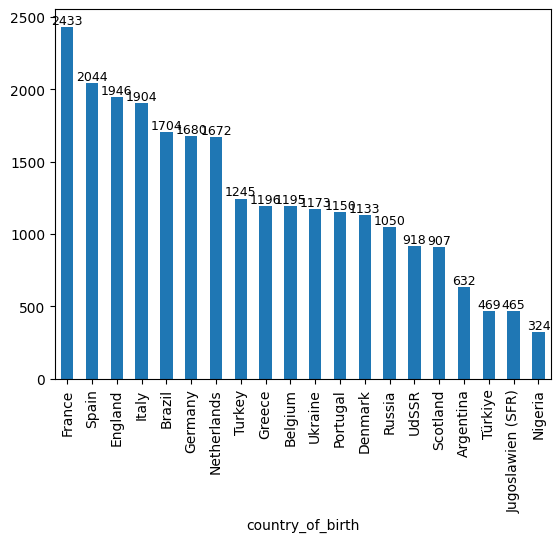

In [32]:
ax = players.country_of_birth.value_counts() \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind="bar")

for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=0
    )

plt.show()

In [33]:
players.loc[players["country_of_birth"] == "Türkiye", "country_of_birth"] = "Turkey"

In [34]:
players.loc[players["country_of_birth"].isin(
    players["country_of_birth"].value_counts()[players["country_of_birth"].value_counts() <= 10].index), "country_of_birth"] = "rest of the world"

In [35]:
players.country_of_birth.value_counts()

country_of_birth
France           2433
Spain            2044
England          1946
Italy            1904
Turkey           1714
                 ... 
Uganda             13
Suriname           13
Armenia            12
Burundi            12
French Guiana      11
Name: count, Length: 115, dtype: int64

### 'data_of_birth" und daraus alter bestimmen

# Explorative Datenanalyse

# Erstellung der Pipelines

# Modellauswahl

# Evulation der Ergebnisse

# Zusammenfassung & Empfehlungen